In [1]:
include("RBM_VMC/includeall.jl")
using BenchmarkTools: @btime
using Plots

In [2]:
# Setting up the physical parameters for the system
dims = 2
num = 2

wf = RBM(dims * num, 16, 1, Random.MersenneTwister())

ham = HORepulsion(1);

nthreads = 12

12

In [3]:
# Setting up the sampling algorithm
metro = Importance(1e3, 1e4, 0.1)
#metro = Metropolis(1e5, 1e6, 0.01)

# Setting the optimization or statistical run scheme
# This decides what extra calculations are done after the vmc calculation, and what values are sampled during
scheme = GradientDescent(lr = 0.0005, maxiter = 100, tol = 1e-9)
#scheme = Blocking()
#scheme = OneBody(dims, num, start = 0, stop = 4, length = 51)

GradientDescent(0.0005, 100, 1.0e-9)

In [4]:
@time results1, wfs = run_scheme(wf, ham, metro, dims, num, nthreads, scheme);
wf = wfs[end];

E = 5.062 iter = 100/100                         6.665254 seconds (34.98 M allocations: 5.521 GiB, 17.59% gc time, 31.35% compilation time)


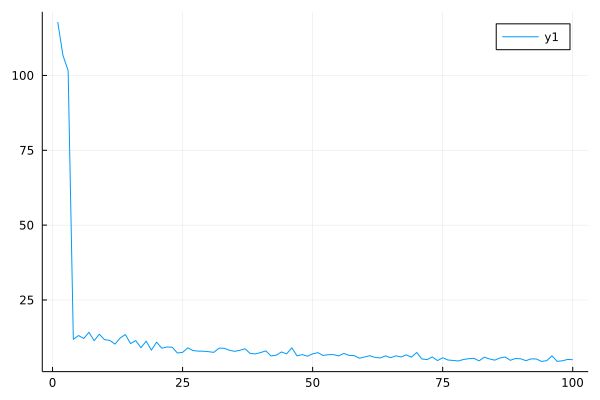

In [5]:
plot([results1[i].E for i in 1:length(results1)])

In [6]:
metro = Importance(1e4, 1e5, 0.1)
#metro = Metropolis(1e5, 1e6, 0.05)

scheme = GradientDescent(lr = 0.01, maxiter = 50, tol = 1e-9)

GradientDescent(0.01, 50, 1.0e-9)

In [7]:
@time results, wfs = run_scheme(wf, ham, metro, dims, num, nthreads, scheme);
wf = wfs[end];

E = 3.148 iter = 50/50                        15.176336 seconds (119.04 M allocations: 24.299 GiB, 41.75% gc time)


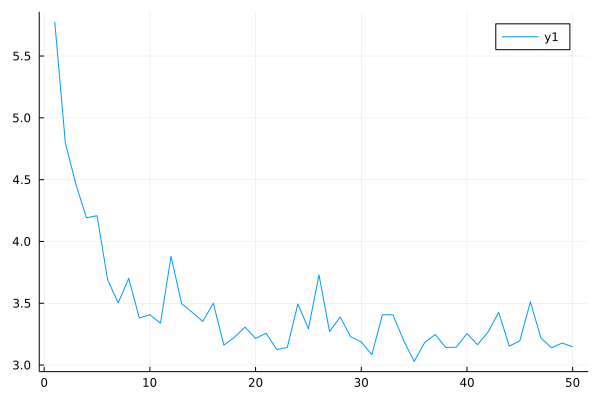

In [9]:
plot([results[i].E for i in 1:length(results)])

In [8]:
wf_b = wfs[end]
metro = Importance(1e6, 1e7, 0.1)
scheme = Blocking()
@time result = run_scheme(wf_b, ham, metro, dims, num, nthreads, scheme);
result

 11.269324 seconds (88.24 M allocations: 8.702 GiB, 22.44% gc time, 0.91% compilation time)


BlockingResult(3.157367188380326, 3.776402081031146, 2.2343891203899036)

In [ ]:
12 -> 3.1391694251134945
14 -> 3.1338139846151902
16 -> 3.117670968746825
20 -> 3.18313356783775